In [1]:
# Matrix plotting from Nilearn: nilearn.plotting.plot_matrix
import numpy as np
import matplotlib.pylab as plt
import glob
import numpy
import pandas as pd
from nilearn.connectome import ConnectivityMeasure
import numpy as np
import seaborn as sns
from nilearn import plotting

        

/Users/nikkibytes/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:

def plot_matrices(matrices, matrix_kind):
    n_matrices = len(matrices)
    fig = plt.figure(figsize=(n_matrices * 4, 4))
    for n_subject, matrix in enumerate(matrices):
        plt.subplot(1, n_matrices, n_subject + 1)
        matrix = matrix.copy()  # avoid side effects
        # Set diagonal to zero, for better visualization
        np.fill_diagonal(matrix, 0)
        vmax = np.max(np.abs(matrix))
        title = '{0}, subject {1}'.format(matrix_kind, n_subject)
        plotting.plot_matrix(matrix, vmin=-vmax, vmax=vmax, cmap='RdBu_r',
                             title=title, figure=fig, colorbar=False)
        
    #fig.savefig("test_1.png")

### prepare data

In [8]:
files=glob.glob('/Users/nikkibytes/Documents/niblunc/data/sub-*')
#files=glob.glob('/projects/niblab/bids_projects/Experiments/Bevel/derivatives/betaseries/output/timeseries/rl/subs/sub-*')
reward_subjects = []
punish_subjects = []
pooled_subjects = []

for f in sorted(files):
    print(f)
    array=numpy.loadtxt(f)
    #print(array)
    pooled_subjects.append(array)
    if "punish" in f.split("/")[-1]:
        punish_subjects.append(array)
    else:
        reward_subjects.append(array)
#print("Reward: {} \nPunish: {} \nPooled: {} \n".format(reward_subjects, punish_subjects, pooled_subjects))

/Users/nikkibytes/Documents/niblunc/data/sub-001_punish.txt
/Users/nikkibytes/Documents/niblunc/data/sub-001_reward.txt
/Users/nikkibytes/Documents/niblunc/data/sub-002_punish.txt
/Users/nikkibytes/Documents/niblunc/data/sub-002_reward.txt
/Users/nikkibytes/Documents/niblunc/data/sub-003_punish.txt
/Users/nikkibytes/Documents/niblunc/data/sub-003_reward.txt
/Users/nikkibytes/Documents/niblunc/data/sub-004_punish.txt
/Users/nikkibytes/Documents/niblunc/data/sub-004_reward.txt
/Users/nikkibytes/Documents/niblunc/data/sub-005_punish.txt
/Users/nikkibytes/Documents/niblunc/data/sub-005_reward.txt
/Users/nikkibytes/Documents/niblunc/data/sub-006_punish.txt
/Users/nikkibytes/Documents/niblunc/data/sub-006_reward.txt
/Users/nikkibytes/Documents/niblunc/data/sub-007_punish.txt
/Users/nikkibytes/Documents/niblunc/data/sub-007_reward.txt
/Users/nikkibytes/Documents/niblunc/data/sub-009_punish.txt
/Users/nikkibytes/Documents/niblunc/data/sub-009_reward.txt


In [9]:
roi_datafile = "/Users/nikkibytes/Documents/niblunc/data/betaseries_rois.txt"
#roi_datafile = "/projects/niblab/bids_projects/Experiments/Bevel/derivatives/betaseries/betaseries_rois.txt"
roi_df = pd.read_csv(roi_datafile, sep="\t")
#print(roi_df.head())
roi_df.set_index("Region", inplace=True)
roi_coords = [tuple(x) for x in roi_df.to_records(index=False)]


Correlations of subjects are stacked in an array of shape (8, 28, 28)
Mean correlation has shape (28, 28).


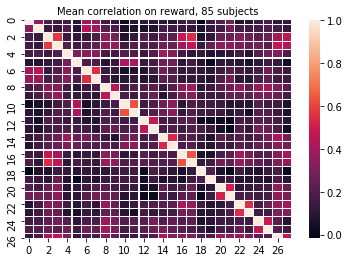

In [10]:
rwd_correlation_measure = ConnectivityMeasure(kind='correlation')

rwd_correlation_matrices = rwd_correlation_measure.fit_transform(reward_subjects)
# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of subjects are stacked in an array of shape {0}'
      .format(rwd_correlation_matrices.shape))
rwd_mean_correlation_matrix = rwd_correlation_measure.mean_
print('Mean correlation has shape {0}.'.format(rwd_mean_correlation_matrix.shape))


#numpy.savetxt("/projects/niblab/bids_projects/Experiments/Bevel/derivatives/betaseries/output/reward_corr_matrix.csv", rwd_mean_correlation_matrix, delimiter=",")
#numpy.savetxt("reward_corr_matrix.csv", rwd_mean_correlation_matrix, delimiter=",")


ax = sns.heatmap(rwd_mean_correlation_matrix, linewidth=0.1)
ax.set_title("Mean correlation on reward, 85 subjects", fontsize=10)
rwd_fig = ax.get_figure()
plt.show()
#rwd_fig.savefig("/projects/niblab/bids_projects/Experiments/Bevel/derivatives/betaseries/output/reward_corr_matrix.png")


#plt.matshow(rwd_mean_correlation_matrix,cmap='hot')
#plot_matrices(rwd_correlation_matrices[:5], 'reward')
#plot_matrices(rwd_mean_correlation_matrix, 'reward')

In [11]:
# test output matrix we just made loads and matches the or
#rwd_mean_correlation_matrix


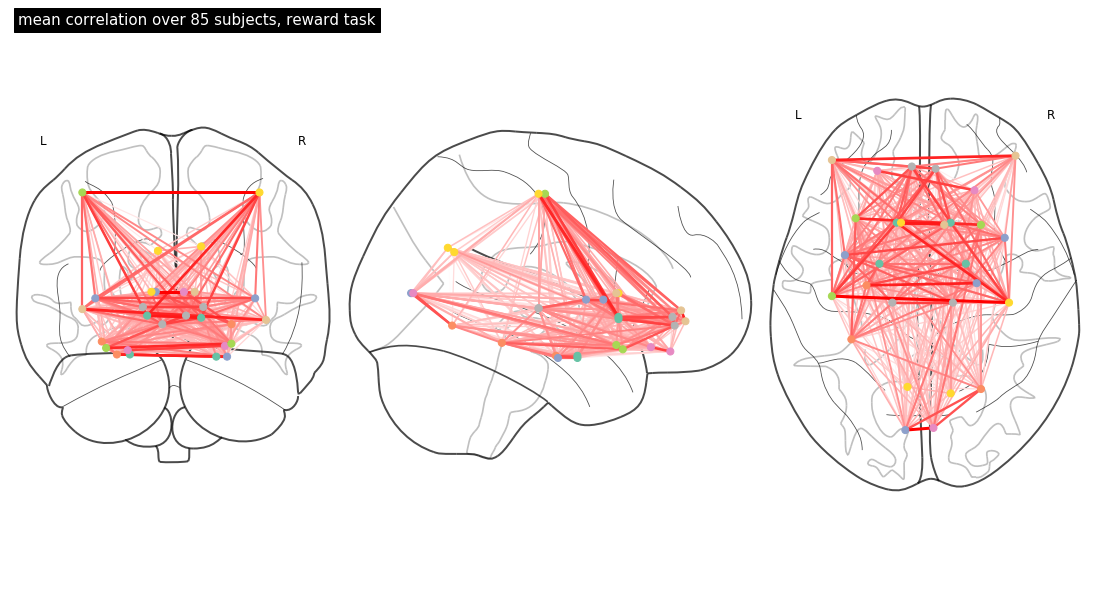

In [27]:
fig=plt.figure(figsize=(15,8))
display=plotting.plot_connectome(rwd_mean_correlation_matrix, roi_coords,
                         title='mean correlation over 85 subjects, reward task', figure=fig)
display.savefig('test_reward_corr_brain.png')     
# Don't forget to close the display
plt.show()
display.close()


In [108]:
corr = np.loadtxt(open("reward_corr_matrix.csv", "rb"), delimiter=",")
rwd_df = pd.DataFrame(corr)

rwd_df.corr

<bound method DataFrame.corr of           0         1         2         3         4         5         6   \
0   1.000000  0.351873  0.188037  0.166101  0.170298  0.087647  0.396550   
1   0.351873  1.000000  0.147202  0.132082  0.192663  0.083389  0.445787   
2   0.188037  0.147202  1.000000  0.577230  0.145692  0.115925  0.139882   
3   0.166101  0.132082  0.577230  1.000000  0.202569  0.155188  0.203203   
4   0.170298  0.192663  0.145692  0.202569  1.000000  0.298979  0.342020   
5   0.087647  0.083389  0.115925  0.155188  0.298979  1.000000  0.186002   
6   0.396550  0.445787  0.139882  0.203203  0.342020  0.186002  1.000000   
7   0.376026  0.383077  0.179233  0.233646  0.327277  0.188465  0.555741   
8   0.168733  0.225590  0.333877  0.332665  0.170193  0.090638  0.144809   
9   0.132849  0.180475  0.293223  0.359474  0.167645  0.128604  0.131293   
10  0.023329  0.058440  0.076288  0.159816  0.199730  0.429246  0.052981   
11  0.096254  0.064698  0.125944  0.209312  0.191071  0.

In [103]:
corr = rwd_df.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = rwd_df.columns[columns]
rwd_df = rwd_df[selected_columns]
rwd_df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
           dtype='int64')

### Punish Task

Correlations of subjects are stacked in an array of shape (8, 28, 28)
Mean correlation has shape (28, 28).


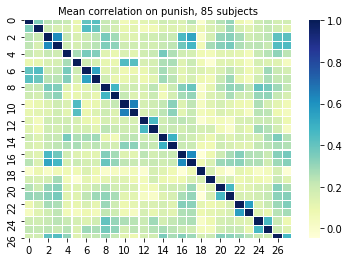

In [94]:
ph_correlation_measure = ConnectivityMeasure(kind='correlation')

ph_correlation_matrices = ph_correlation_measure.fit_transform(punish_subjects)

# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of subjects are stacked in an array of shape {0}'
      .format(ph_correlation_matrices.shape))
ph_mean_correlation_matrix = ph_correlation_measure.mean_
print('Mean correlation has shape {0}.'.format(ph_mean_correlation_matrix.shape))

numpy.savetxt("/projects/niblab/bids_projects/Experiments/Bevel/derivatives/betaseries/output/punish_corr_matrix.csv", ph_mean_correlation_matrix, delimiter=",")


ax = sns.heatmap(ph_mean_correlation_matrix, cmap="YlGnBu" ,linewidth=0.1)
ph_fig = ax.get_figure()
ax.set_title("Mean correlation on punish, 85 subjects", fontsize=10)
plt.show()
ph_fig.savefig("/projects/niblab/bids_projects/Experiments/Bevel/derivatives/betaseries/output/punish_corr_matrix.png")


#plot_matrices(ph_correlation_matrices[:5], 'punish')

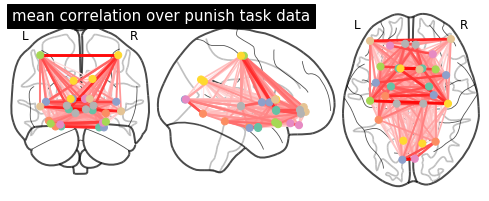

In [87]:
display = plotting.plot_connectome(ph_mean_correlation_matrix, roi_coords,
                         title='mean correlation over 85 subjects, punish task')

display.savefig('/projects/niblab/bids_projects/Experiments/Bevel/derivatives/betaseries/output/punish_corr_brain.png')     
# Don't forget to close the display
display.close() 

### Partial and tangent 

In [52]:
type(ph_mean_correlation_matrix)

numpy.ndarray

In [53]:
partial_correlation_measure = ConnectivityMeasure(kind='partial correlation')
partial_correlation_matrices = partial_correlation_measure.fit_transform(punish_subjects)

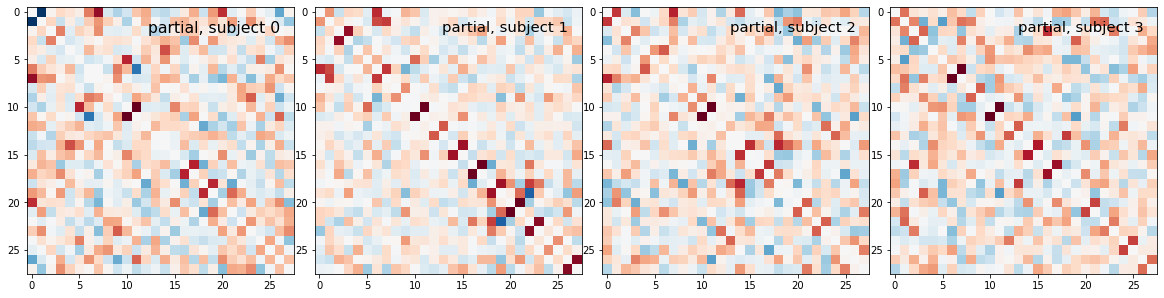

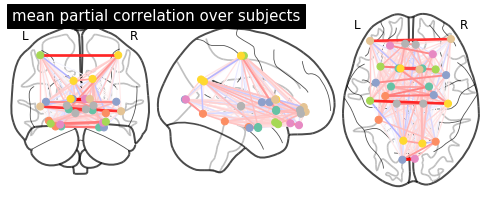

In [54]:
plot_matrices(partial_correlation_matrices[:4], 'partial')
plotting.plot_connectome(
    partial_correlation_measure.mean_, roi_coords,
    title='mean partial correlation over subjects')

In [56]:
tangent_measure = ConnectivityMeasure(kind='tangent')
tangent_matrices = tangent_measure.fit_transform(pooled_subjects)

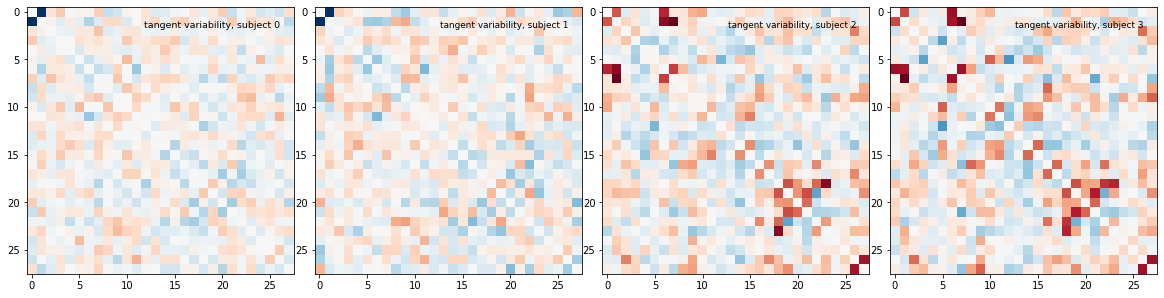

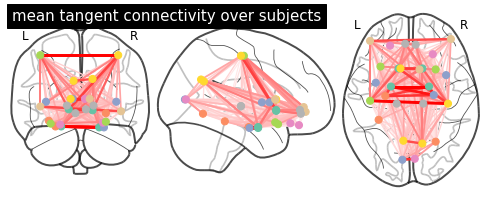

In [57]:
plot_matrices(tangent_matrices[:4], 'tangent variability')
plotting.plot_connectome(
    tangent_measure.mean_, roi_coords,
    title='mean tangent connectivity over subjects')

In [58]:
connectivity_biomarkers = {}
kinds = ['correlation', 'partial correlation', 'tangent']
for kind in kinds:
    conn_measure = ConnectivityMeasure(kind=kind, vectorize=True)
    connectivity_biomarkers[kind] = conn_measure.fit_transform(pooled_subjects)

# For each kind, all individual coefficients are stacked in a unique 2D matrix.
print('{0} correlation biomarkers for each subject.'.format(
    connectivity_biomarkers['correlation'].shape[1]))

406 correlation biomarkers for each subject.
